In [1]:
import torch
import torch.nn as nn

In [2]:

class RNNCell(nn.Module):
    
    def __init__(self, input_size, hidden_size):
        super(RNNCell, self).__init__()

        self.xh = nn.Linear(input_size, hidden_size)
        self.hh = nn.Linear(hidden_size, hidden_size)
       
        self.ch = nn.Linear(input_size+hidden_size, hidden_size)
        
    def forward(self, x, h):
        h = self.xh(x) + self.hh(h)
        return h
    def forward2(self, x, h):

        concat = torch.cat((x, h), 1)
        h = self.ch(concat)
        return h
        

class CleanBasicRNN(nn.Module):
    def __init__(self,  n_inputs, n_neurons):
        super(CleanBasicRNN, self).__init__()
        
        self.n_neurons = n_neurons
        self.rnn = RNNCell(n_inputs, n_neurons)
        
    def forward(self, X): # [seq_len, batch_size, input_size]
        output = []

        hx = torch.zeros(X.shape[1], self.n_neurons)
        # for each time step
        for i in range(X.shape[0]):
            hx = self.rnn.forward2(X[i], hx)
            output.append(hx)
        
        return output, hx

FIXED_BATCH_SIZE = 4 # our batch size is fixed for now
N_INPUT = 3
N_NEURONS = 5

X_batch = torch.tensor([[[0,1,2], [3,4,5], 
                         [6,7,8], [9,0,1]],
                        [[9,8,7], [0,0,0], 
                         [6,5,4], [3,2,1]]
                       ], dtype = torch.float) # X0 and X1


model = CleanBasicRNN(N_INPUT, N_NEURONS)
output_val, states_val = model(X_batch)
print(output_val) # contains all output for all timesteps
print(states_val) # contains values for final state or final timestep, i.e., t=1

[tensor([[-0.1170, -0.4096, -0.2479, -0.4454, -0.7705],
        [-0.2185,  0.0560, -0.9845, -1.8440, -1.5295],
        [-0.3199,  0.5217, -1.7211, -3.2425, -2.2885],
        [ 1.4006,  1.2876, -0.7656, -3.4194, -1.1290]],
       grad_fn=<AddmmBackward>), tensor([[ 0.0504,  1.6059, -2.2041, -3.6101, -2.3610],
        [-0.0566,  0.2334, -0.2526, -0.0286, -0.7397],
        [-0.0437,  1.5011, -1.5801, -2.4966, -1.8810],
        [ 0.2074,  0.5984, -1.0458, -2.0238,  0.0129]],
       grad_fn=<AddmmBackward>)]
tensor([[ 0.0504,  1.6059, -2.2041, -3.6101, -2.3610],
        [-0.0566,  0.2334, -0.2526, -0.0286, -0.7397],
        [-0.0437,  1.5011, -1.5801, -2.4966, -1.8810],
        [ 0.2074,  0.5984, -1.0458, -2.0238,  0.0129]],
       grad_fn=<AddmmBackward>)


In [3]:
rnn = nn.RNN(10, 20, 2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(2, 3, 20)
output, hn = rnn(input, h0)

In [4]:
output.shape

torch.Size([5, 3, 20])

In [5]:
from pylab import *

In [8]:
math.atan2(1,2)

0.4636476090008061

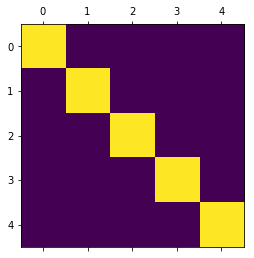

In [19]:
matshow(np.identity(5))

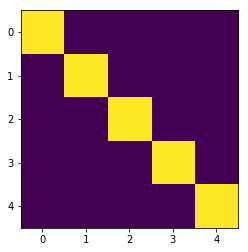

In [22]:
imshow(np.identity(5))

In [25]:
np.sum((1.,2))

3.0

In [28]:
_1

NameError: name '_1' is not defined

In [44]:
sum((3,3))

6